In [5]:
import pathlib
import textwrap
from google import generativeai as GenAI
from constant import GOOGLE_API_KEY
from IPython.display import display
from IPython.display import Markdown

In [6]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [7]:
GenAI.configure(api_key=GOOGLE_API_KEY)

In [8]:
# for m in GenAI.list_models():
#   if 'generateContent' in m.supported_generation_methods:
#     print(m.name)

In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [10]:
LLM = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY)
result = LLM.invoke("who is the winner of T20 men's world cup 2024?")

In [11]:
to_markdown(result.content)

> As of my knowledge cutoff in May 2023, the T20 Men's World Cup 2024 has not yet been held, so I do not have information on the winner.

<h1>Gemini Vision</h1>

In [12]:
import PIL.Image

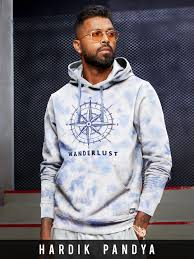

In [13]:
img = PIL.Image.open('download.jpg')
img


In [14]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import  ChatGoogleGenerativeAI

In [15]:
input1 = input("Enter question")

In [16]:
LLM = ChatGoogleGenerativeAI(model='gemini-pro-vision',google_api_key=GOOGLE_API_KEY)
message = HumanMessage(
    content=[
        {
            'type' : 'text',
            'text' : f'{input1}'
        },
        {
            'type' : 'image_url',
            'image_url' : 'download.jpg'
        }
    ]
)
result = LLM.invoke([message])

In [17]:
to_markdown(result.content)

>  Hardik Pandya is an Indian cricketer who plays for the Indian national team and the Indian Premier League franchise Mumbai Indians. He is a right-handed all-rounder who bats in the middle order and bowls right-arm fast-medium. He is known for his aggressive batting and bowling style.

<h1>RAG Model</h1>

In [2]:
import urllib
import warnings
from pathlib import Path as p 
import pprint
import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from constant import GOOGLE_API_KEY

warnings.filterwarnings('ignore')


In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [4]:
Model = ChatGoogleGenerativeAI(model='gemini-pro',google_api_key=GOOGLE_API_KEY, temperature=0.4, convert_system_message_to_human= True)

In [5]:
pdf_loader = PyPDFLoader("Assignments MPI.pdf")
pages = pdf_loader.load_and_split()
print(pages[0].page_content)

Assignment 1 
CO1: Demonstrate the various features of microprocessor, memory and I/O devices including 
concepts of system bus. 
1. Draw and explain microprocessor system with bus organization. 
2. Classify memory devices and explain each type in short. 
 
Assignment 2 
CO2: Identify the hardware elements of 8085 microprocessor including architecture and pin functions 
and programming model including registers, instruction set and addressing modes. 
1. Draw and explain block diagram of 8085. 
2. Explain how demultiplexing of address and data buses is done using neat diagrams. 
3. Describe programmer’s model of 8085. 
 
Assignment 3 
CO3: Select appropriate 8085 instructions based on size and functions to write a given assembly 
language program. 
1. Explain classification of 8085 instructions. 
2. Describe addressing modes of 8085. 
 
Assignment 4 
CO4: Design a given interfacing system using concepts of memory and I/O interfacing. 
1. Differentiate between Memory mapped I/O and I/O m

In [6]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap = 1000)
context = '\n\n'.join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [7]:
texts

['Assignment 1 \nCO1: Demonstrate the various features of microprocessor, memory and I/O devices including \nconcepts of system bus. \n1. Draw and explain microprocessor system with bus organization. \n2. Classify memory devices and explain each type in short. \n \nAssignment 2 \nCO2: Identify the hardware elements of 8085 microprocessor including architecture and pin functions \nand programming model including registers, instruction set and addressing modes. \n1. Draw and explain block diagram of 8085. \n2. Explain how demultiplexing of address and data buses is done using neat diagrams. \n3. Describe programmer’s model of 8085. \n \nAssignment 3 \nCO3: Select appropriate 8085 instructions based on size and functions to write a given assembly \nlanguage program. \n1. Explain classification of 8085 instructions. \n2. Describe addressing modes of 8085. \n \nAssignment 4 \nCO4: Design a given interfacing system using concepts of memory and I/O interfacing. \n1. Differentiate between Memo

In [8]:
embeddings = GoogleGenerativeAIEmbeddings(model='models/embedding-001',google_api_key=GOOGLE_API_KEY)

In [9]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={'k':5})

: 

In [ ]:
qa_chain = RetrivalQA()